INITIAL UNDERSTANDING:

Given the high correlation of most variables with the target variable, Linear Regression is employed as the chosen model for analysis.

#Import necessary libraries

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Reading data into a dataframe.

In [2]:
df = pd.read_csv("/content/drive/MyDrive/HOME_LLC/US_Home_Prices_Influencing_Factors_Dataset.csv").set_index("DATE")

In [3]:
df.head()

,CSUSHPISA,Year,Month,Per_Capita_GDP,Working_Population,Houses,CPI,UNRATE,Cons_Materials,FEDFUNDS,Num_Households,Income,Subsidy
DATE,,,,,,,,,,,,,
2002-10-01,125.735,2002,10,50302.000000,1.845542e+08,4.0,181.2,5.7,145.0,1.75,109297.0,65820.0,24.183
2002-11-01,126.670,2002,11,50355.333333,1.847447e+08,4.0,181.5,5.9,144.6,1.34,109297.0,65820.0,24.183
2002-12-01,127.624,2002,12,50408.666667,1.848600e+08,4.0,181.8,6.0,144.3,1.24,109297.0,65820.0,24.183
2003-01-01,128.461,2003,1,50462.000000,1.856353e+08,4.0,182.6,5.8,144.4,1.24,111278.0,65860.0,25.930
2003-02-01,129.355,2003,2,50573.333333,1.858697e+08,4.5,183.6,5.9,145.2,1.26,111278.0,65860.0,25.930


In [4]:
df.tail()

,CSUSHPISA,Year,Month,Per_Capita_GDP,Working_Population,Houses,CPI,UNRATE,Cons_Materials,FEDFUNDS,Num_Households,Income,Subsidy
DATE,,,,,,,,,,,,,
2022-08-01,301.473,2022,8,65569.000000,2.073707e+08,8.7,295.320,3.7,342.753,2.33,131202.0,74580.0,48.021
2022-09-01,299.353,2022,9,65676.000000,2.074536e+08,9.7,296.539,3.5,336.464,2.56,131202.0,74580.0,48.021
2022-10-01,298.873,2022,10,65783.000000,2.074312e+08,9.7,297.987,3.7,333.796,3.08,131202.0,74580.0,48.021
2022-11-01,298.269,2022,11,65881.333333,2.075219e+08,9.4,298.598,3.6,330.369,3.78,131202.0,74580.0,48.021
2022-12-01,297.413,2022,12,65979.666667,2.075245e+08,8.5,298.990,3.5,326.449,4.10,131202.0,74580.0,48.021


# Dropping year and month columns

In [5]:
df.drop(columns = ["Year", "Month"], inplace = True)

## Correlation of data

In [6]:
df.corr()

,CSUSHPISA,Per_Capita_GDP,Working_Population,Houses,CPI,UNRATE,Cons_Materials,FEDFUNDS,Num_Households,Income,Subsidy
CSUSHPISA,1.000000,0.897290,0.582412,0.134888,0.807717,-0.499334,0.891255,0.132312,0.727307,0.833966,0.832671
Per_Capita_GDP,0.897290,1.000000,0.838118,0.018688,0.941572,-0.460067,0.910989,-0.092853,0.930874,0.857502,0.924112
Working_Population,0.582412,0.838118,1.000000,0.097422,0.922252,-0.104862,0.776946,-0.374804,0.961787,0.593444,0.862308
Houses,0.134888,0.018688,0.097422,1.000000,0.109191,0.063066,0.182297,0.223456,-0.003224,-0.052214,0.073035
CPI,0.807717,0.941572,0.922252,0.109191,1.000000,-0.216772,0.945751,-0.302750,0.971670,0.717381,0.968244
UNRATE,-0.499334,-0.460067,-0.104862,0.063066,-0.216772,1.000000,-0.264466,-0.513785,-0.232133,-0.496443,-0.152144
Cons_Materials,0.891255,0.910989,0.776946,0.182297,0.945751,-0.264466,1.000000,-0.219834,0.863135,0.681132,0.931316
FEDFUNDS,0.132312,-0.092853,-0.374804,0.223456,-0.302750,-0.513785,-0.219834,1.000000,-0.342463,0.088760,-0.315315
Num_Households,0.727307,0.930874,0.961787,-0.003224,0.971670,-0.232133,0.863135,-0.342463,1.000000,0.740401,0.940140
Income,0.833966,0.857502,0.593444,-0.052214,0.717381,-0.496443,0.681132,0.088760,0.740401,1.000000,0.777006


# Separate the target variable and the independent variable

In [7]:
y = df.pop("CSUSHPISA")
X = df

# scatter plots of the CASE-SHILLER index vs features

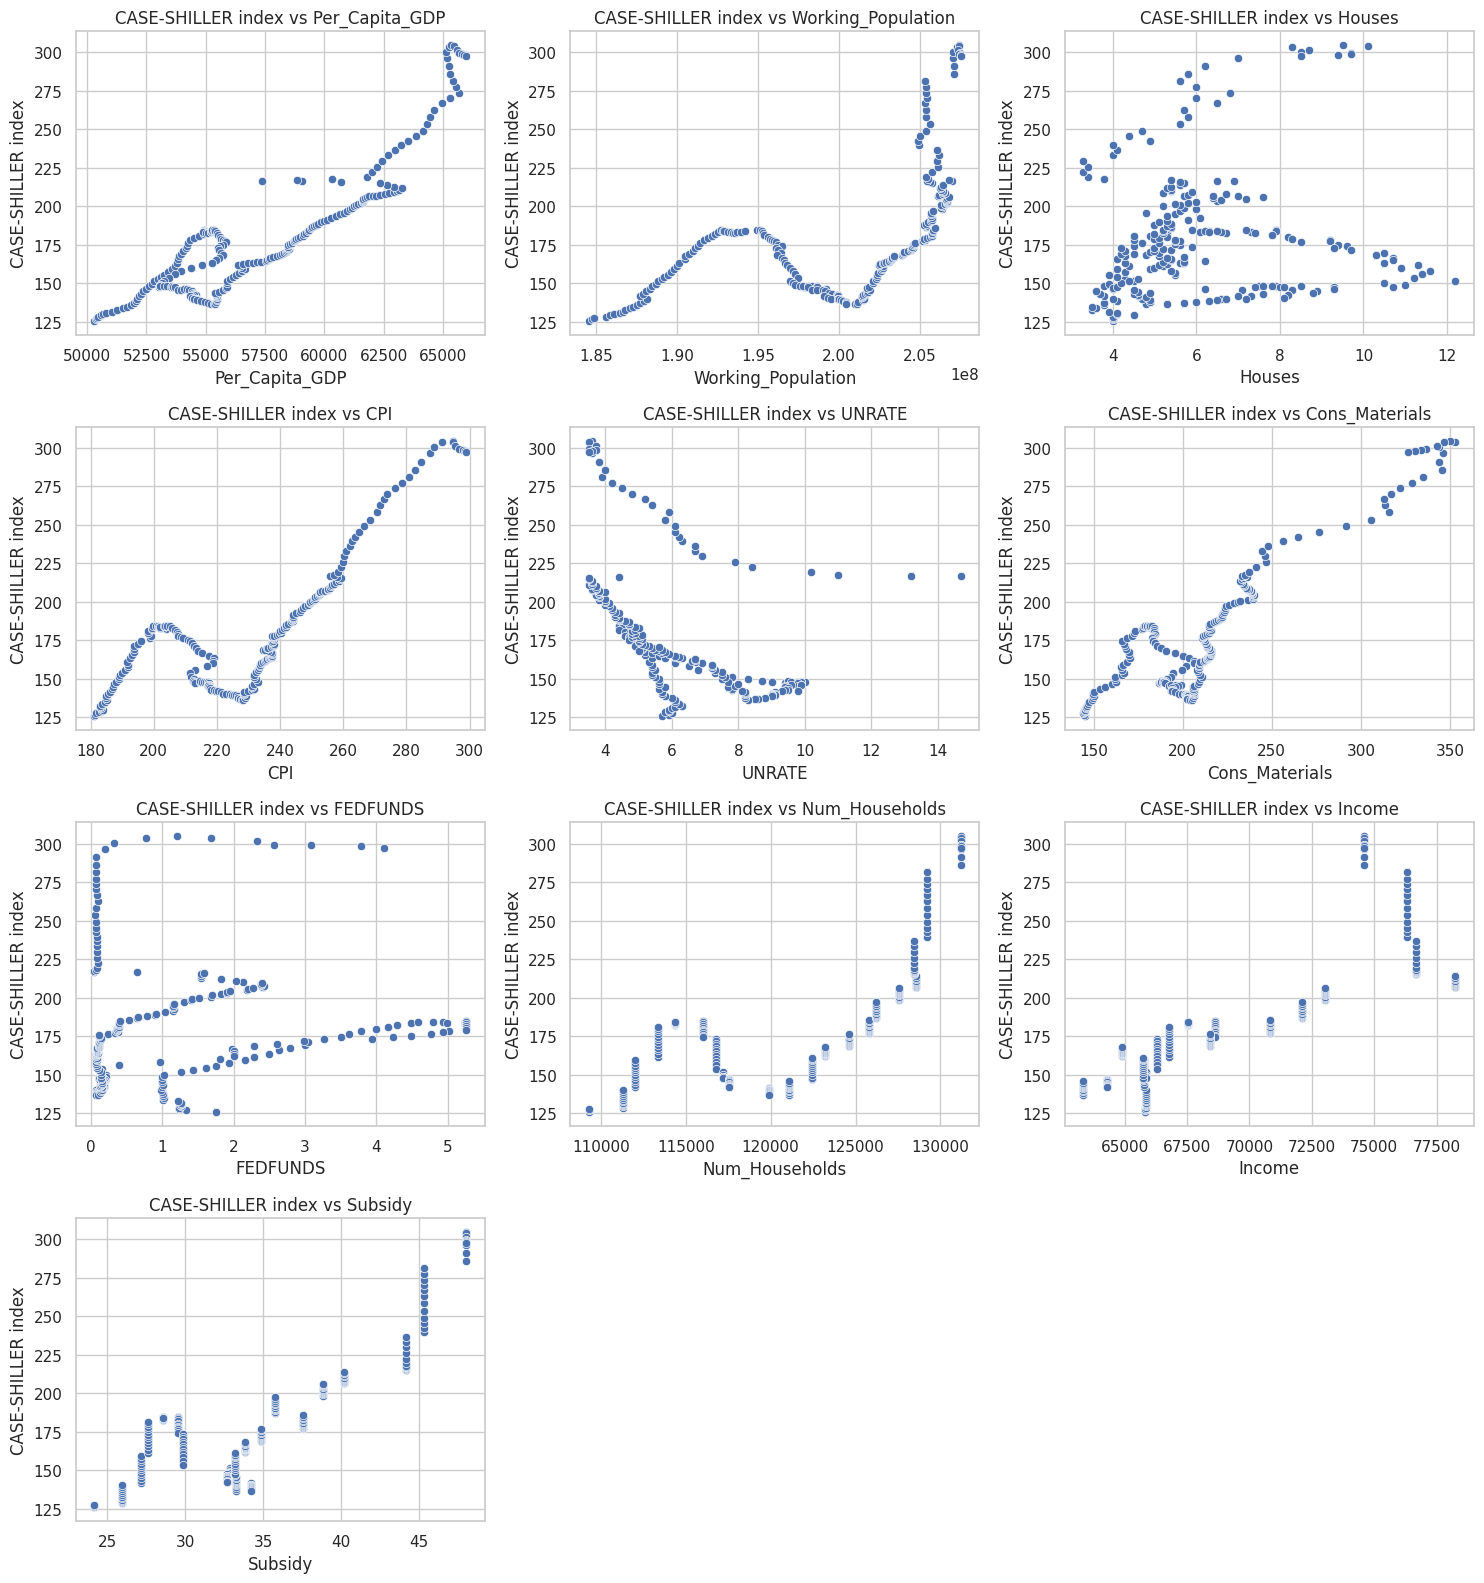

In [8]:
# Set the style
sns.set(style="whitegrid")

# Specify the number of columns for the grid layout
cols = 3
rows = len(X.columns) // cols + 1

# Create a grid layout
fig, axes = plt.subplots(rows, cols, figsize=(15, 4 * rows))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Plotting scatter plots of the CASE-SHILLER index vs features
for i, feature in enumerate(X.columns):
    sns.scatterplot(x=X[feature], y=y, ax=axes[i])
    axes[i].set(xlabel=feature, ylabel="CASE-SHILLER index")
    axes[i].set_title(f"CASE-SHILLER index vs {feature}")

# Remove empty subplots
for j in range(len(X.columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


Based on the examination of the correlation matrix and scatter plots, several observations emerge:

- There is a negative correlation between the unemployment rate and home prices, aligning with expectations.
- Surprisingly, the number of new houses exhibits nearly zero correlation. This unexpected result suggests that the quantity of newly constructed houses might not be substantial enough to exert a significant downward pressure on prices.
- The influence of the great recession is evident across almost all plots.
- Interest rates appear to have a minor negative influence on home prices.
- All remaining variables demonstrate a positive correlation with home prices.

# Drop multicollinearity columns

In [9]:
mult_cols = ["Working_Population", "CPI", "Num_Households",
             "Subsidy", "Cons_Materials", "Income"]
df.drop(columns = mult_cols, inplace = True)
X = df

In [10]:
# Scaling
scalar = MinMaxScaler()
X = scalar.fit_transform(X)

In [12]:
# Splitting data into train and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size = 0.2, random_state = 42)

# Linear Regression Model

In [13]:
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_valid)
score = r2_score(pred, y_valid)
print("The r2_score for the validation set is: ", score)

The r2_score for the validation set is:  0.8072193381232502


In [14]:
coefs = model.coef_
cols = df.columns
for i in range(len(coefs)):
    print(f"The coefficient for {cols[i]} is {coefs[i]}")

The coefficient for Per_Capita_GDP is 152.4997459323746
The coefficient for Houses is 10.253191246904528
The coefficient for UNRATE is 18.832014577288096
The coefficient for FEDFUNDS is 33.414522005932184


In [15]:
print("The intercept is: ", model.intercept_)

The intercept is:  95.69482666065171


CONCLUSION PART:

Given that most variables exhibit an increasing trend over time, a high correlation is anticipated. Therefore, rather than relying solely on a linear model, a more direct approach involves studying the impact of variables on the home price index through scatter plots.